In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [43]:
# generate linear regression data
# noise: control the discrete of data
# n_features: the shape of X
X, y = make_regression(n_samples=100,n_features=1,noise=10)


In [44]:
reshaped_y = y.reshape((100,1))
train_X,test_X, train_y, test_y =\
train_test_split(X, reshaped_y, test_size=0.2, random_state=0)

linear_regression = LinearRegression()
linear_regression.fit(train_X, train_y)
predict = linear_regression.predict(test_X)

score = linear_regression.score(train_X, train_y)
print('Accuracy:', score)

Accuracy: 0.9485968208010686


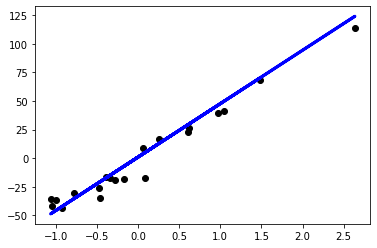

In [45]:
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, predict, color='blue', linewidth=3)

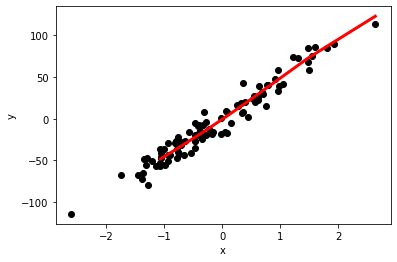

In [46]:
pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
pipeline.fit(np.array(train_X), train_y)
p_pred=pipeline.predict(test_X)
df = pd.DataFrame({'x': test_X[:,0], 'y': p_pred[:,0]})
values = df.sort_values(by='x', inplace=True)

points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="red", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,y, color="black")
plt.show()